Elapsed Time for Multithreaded Matrix Multiplication (size 3x3): 0.0010571479797363281 seconds
Matrix A:
[[0.79409511 0.59918187 0.65561266]
 [0.97300119 0.93857502 0.85439715]
 [0.37213329 0.29002841 0.3915905 ]]
Matrix B:
[[0.08347739 0.13168967 0.81973225]
 [0.12525413 0.34723469 0.49120333]
 [0.91536366 0.33658273 0.25154878]]
Result:
[[0.74146299 0.53329876 1.11018406]
 [0.9808681  0.74161534 1.47355419]
 [0.42583969 0.28151664 0.54601669]]

Elapsed Time for Multithreaded Matrix Multiplication (size 10x10): 0.002239704132080078 seconds
Elapsed Time for Multithreaded Matrix Multiplication (size 100x100): 1.7318408489227295 seconds
Elapsed Time for Multithreaded Matrix Multiplication (size 200x200): 8.142737865447998 seconds
Elapsed Time for Multithreaded Matrix Multiplication (size 300x300): 25.410099744796753 seconds
Elapsed Time for Multithreaded Matrix Multiplication (size 400x400): 61.72125601768494 seconds
Elapsed Time for Multithreaded Matrix Multiplication (size 500x500): 12

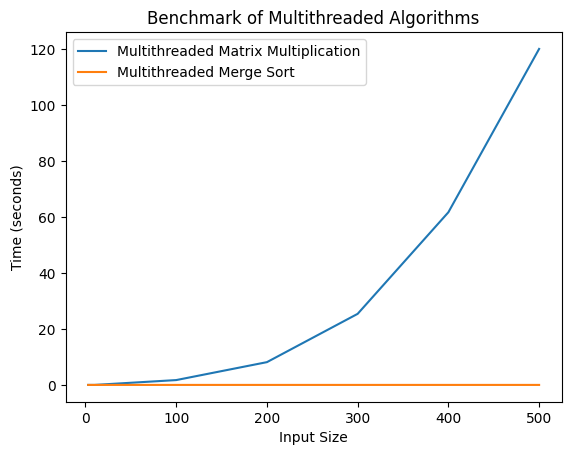

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
import concurrent.futures
import threading

def multithreaded_matrix_multiplication(A, B):
    n = len(A)
    result = np.zeros((n, n))

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for i in range(n):
            # Spawn
            futures.append(executor.submit(multiply_row, A, B, i))

        # Sync
        concurrent.futures.wait(futures)


        for i, future in enumerate(futures):
            result[i] = future.result()

    return result

def multiply_row(A, B, i):
    n = len(A)
    row_result = np.zeros(n)
    for j in range(n):
        for k in range(n):
            row_result[j] += A[i][k] * B[k][j]
    return row_result

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right)

def merge(left, right):
    merged = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    while i < len(left):
        merged.append(left[i])
        i += 1

    while j < len(right):
        merged.append(right[j])
        j += 1
    return merged

def multi_threaded_merge_sort(arr, num_threads):
    if num_threads <= 1:
        return merge_sort(arr)

    size = len(arr) // num_threads
    sublists = [arr[i:i+size] for i in range(0, len(arr), size)]

    threads = []
    sorted_sublists = []
    for sublist in sublists:
        thread = threading.Thread(target=lambda sublist: sorted_sublists.append(merge_sort(sublist)), args=(sublist,))
        thread.start()
        threads.append(thread)
    for thread in threads:
        thread.join()

    merged = sorted_sublists[0]
    for sublist in sorted_sublists[1:]:
        merged = merge(merged, sublist)
    return merged


def generate_input_matrices(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    return A, B

def generate_input_array(n):
    arr = np.random.randint(0, 100, size=n)
    return arr

def benchmark_matrix_multiplication(input_sizes):
    times = []
    for n in input_sizes:
        A, B = generate_input_matrices(n)
        start_time = time.time()
        result = multithreaded_matrix_multiplication(A, B)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)

        print(f"Elapsed Time for Multithreaded Matrix Multiplication (size {n}x{n}): {elapsed_time} seconds")
        if n == 3:
            print("Matrix A:")
            print(A)
            print("Matrix B:")
            print(B)
            print("Result:")
            print(result)
            print()

    return times

def benchmark_merge_sort(input_sizes):
    times = []
    for n in input_sizes:
        arr = generate_input_array(n)
        start_time = time.time()
        sorted_arr = multi_threaded_merge_sort(arr, 2)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)

        print(f"Elapsed Time for Multithreaded Merge Sort (size {n}): {elapsed_time} seconds")
        if n == 10:
            print("Input Array:")
            print(arr)
            print("Sorted Array:")
            print(sorted_arr)
            print()

    return times

if __name__ == "__main__":
    input_sizes = [3, 10, 100, 200, 300, 400, 500]

    matrix_times = benchmark_matrix_multiplication(input_sizes)

    merge_sort_times = benchmark_merge_sort(input_sizes)

    plt.plot(input_sizes, matrix_times, label='Multithreaded Matrix Multiplication')
    plt.plot(input_sizes, merge_sort_times, label='Multithreaded Merge Sort')
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('Benchmark of Multithreaded Algorithms')
    plt.legend()
    plt.show()
